Import library

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
path = './Dataset/'
address_csv = 'passingevents.csv'
df = pd.read_csv(path + address_csv)
print(df.head(5))

   MatchID     TeamID OriginPlayerID DestinationPlayerID MatchPeriod  \
0        1    Huskies     Huskies_D1          Huskies_F1          1H   
1        1    Huskies     Huskies_M1          Huskies_F2          1H   
2        1  Opponent1   Opponent1_D2        Opponent1_G1          1H   
3        1  Opponent1   Opponent1_G1        Opponent1_F1          1H   
4        1    Huskies     Huskies_M2          Huskies_M3          1H   

   EventTime EventSubType  EventOrigin_x  EventOrigin_y  EventDestination_x  \
0  46.323501    Head pass             34             97                59.0   
1  51.022546  Simple pass             53             89                69.0   
2  89.008721  Simple pass             19             16                 5.0   
3  92.216160       Launch              5             50                67.0   
4  98.265191  Simple pass             42             55                36.0   

   EventDestination_y  
0                95.0  
1                91.0  
2                50.

In [9]:
player_des_huskies = df[df["TeamID"] == 'Huskies'].iloc[:, 3]  # des为HusKies接球队员
player_ori_huskies = df[df["TeamID"] == 'Huskies'].iloc[:, 2]  # ori为Huskies出球队员
player_ori_huskies = list(player_ori_huskies.unique())
player_des_huskies = list(player_des_huskies.unique())
player_ori_huskies.sort()
player_des_huskies.sort()
dis_ori_x = list(df["EventOrigin_x"])
dis_ori_y = list(df["EventOrigin_y"])
dis_des_x = list(df["EventDestination_x"])
dis_des_y = list(df["EventDestination_y"])
distance = []
for i in range(len(dis_des_y)):
    distance.append(((dis_ori_x[i] - dis_des_x[i]) ** 2 + (dis_des_y[i] - dis_ori_y[i]) ** 2) ** 0.5)
    distance[i] = int(distance[i] / 3)
# print(distance[0:5])

player_huskies = player_ori_huskies  # 出球与接球队员相同，归结为参与的队员


In [11]:

weight = [0.780373832, 0.81795196, 0.812659847, 0.832448093, 0.842606707, 0.841178878, 0.83362069,
          0.849388753, 0.835820896, 0.836218375, 0.842622951, 0.84305835, 0.812176166, 0.829679595,
          0.806215722, 0.705202312, 0.773413897, 0.746212121, 0.79342723, 0.720430108, 0.645833333,
          0.714285714, 0.721518987, 0.639344262, 0.818181818, 0.846153846, 0.9375, 0.875, 0.8, 0.8, 0.8,
          0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]

pairs_distinct = []
for i in range(len(player_ori_huskies) - 1):
    for j in range(i + 1, len(player_ori_huskies)):
        pairs_distinct.append([player_ori_huskies[i], player_ori_huskies[j]])
# df["pairs"]='['+df.iloc[:,2].map(str)+','+df.iloc[:,3].map(str)+']'
ori_player = df.iloc[:, 2].tolist()
des_player = df.iloc[:, 3].tolist()

# pairs=df.iloc[:,11]
pairs = []
for i in range(len(ori_player)):
    if (ori_player[i] <= des_player[i]):
        pairs.append([ori_player[i], des_player[i]])
    if (ori_player[i] > des_player[i]):
        pairs.append([des_player[i], ori_player[i]])
# print(pairs_distinct[1])
count_link = []
pairs_each = []
k = 0
for i in range(435):
    count_link.append(0)
# print(len(pairs_distinct))
for i in range(len(pairs)):
    pairs_each.append(pairs[i])
for i in pairs_distinct:
    for j in range(len(pairs_each)):
        if pairs_each[j] == i:
            count_link[k] = count_link[k] + weight[distance[j]]
    k = k + 1

# 按pairs里面的顺序每组关系计数
pairs_distinct_1 = []
for i in range(len(player_ori_huskies) - 1):
    for j in range(i + 1, len(player_ori_huskies)):
        pairs_distinct_1.append([player_ori_huskies[i], player_ori_huskies[j]])
for k in range(len(pairs_distinct_1)):
    pairs_distinct_1[k].append(count_link[k])
print(pairs_distinct_1[0:5])




[['Huskies_D1', 'Huskies_D10', 2.338683254], ['Huskies_D1', 'Huskies_D2', 100.49782195700014], ['Huskies_D1', 'Huskies_D3', 165.0442454440001], ['Huskies_D1', 'Huskies_D4', 107.81701585000005], ['Huskies_D1', 'Huskies_D5', 77.90643781600005]]


In [13]:
# 求每一个球员传球位置均值
player_ori_arr = []
player_des_arr = []
player_x = []
player_y = []
pos_player_mean = {}

for i in player_huskies:
    _df1 = df[df['OriginPlayerID'] == i]
    _df2 = df[df['DestinationPlayerID'] == i]
    player_ori_arr.append(_df1)
    player_des_arr.append(_df2)

    _x1 = list(_df1['EventOrigin_x'])
    _x2 = list(_df2['EventDestination_x'])
    _x = _x1 + _x2
    _mean_x = np.sum(_x) / np.size(_x)

    _y1 = list(_df1['EventOrigin_y'])
    _y2 = list(_df2['EventDestination_y'])
    _y = _y1 + _y2
    _mean_y = np.sum(_y) / np.size(_y) / 105 * 65

    player_x.append(_mean_x)
    player_y.append(_mean_y)

    _l = [_mean_x, _mean_y]
    pos_player_mean[i] = _l

df.columns
print(df.head(5))

   MatchID     TeamID OriginPlayerID DestinationPlayerID MatchPeriod  \
0        1    Huskies     Huskies_D1          Huskies_F1          1H   
1        1    Huskies     Huskies_M1          Huskies_F2          1H   
2        1  Opponent1   Opponent1_D2        Opponent1_G1          1H   
3        1  Opponent1   Opponent1_G1        Opponent1_F1          1H   
4        1    Huskies     Huskies_M2          Huskies_M3          1H   

   EventTime EventSubType  EventOrigin_x  EventOrigin_y  EventDestination_x  \
0  46.323501    Head pass             34             97                59.0   
1  51.022546  Simple pass             53             89                69.0   
2  89.008721  Simple pass             19             16                 5.0   
3  92.216160       Launch              5             50                67.0   
4  98.265191  Simple pass             42             55                36.0   

   EventDestination_y  
0                95.0  
1                91.0  
2                50.

In [51]:
Hus_data = df.loc[df['TeamID'] == 'Huskies']
groupOri = Hus_data.groupby(['MatchID', 'OriginPlayerID']).count()
groupDes = Hus_data.groupby(['MatchID', 'DestinationPlayerID']).count()
groupOri = pd.DataFrame(groupOri, columns=['TeamID'])
groupDes = pd.DataFrame(groupDes, columns=['TeamID'])
groupOri.rename(columns={'TeamID': 'count1'}, inplace=True)
groupDes.rename(columns={'TeamID': 'count2'}, inplace=True)
sumCount = pd.concat([groupOri, groupDes], axis=1)
sumCount.fillna(0, inplace=True)
sumCount['count'] = sumCount['count1'] + sumCount['count2']
index = sumCount.index.to_frame()


In [69]:
# sumCount = sumCount['count']
sumCount = pd.concat([sumCount['count'], index['MatchID']], axis=1)  #每场比赛每名球员传球数（传出+接受）
sumbyPlayer = pd.concat([sumCount['count'], index[1]], axis=1)
PointSize = sumbyPlayer.groupby(1).sum()  #每名球员所有场次传球数和
print(PointSize)

              count
1                  
Huskies_D1   1529.0
Huskies_D10    69.0
Huskies_D2   1047.0
Huskies_D3   1309.0
Huskies_D4   1184.0
Huskies_D5   1206.0
Huskies_D6    649.0
Huskies_D7    857.0
Huskies_D8    550.0
Huskies_D9     98.0
Huskies_F1    711.0
Huskies_F2   1786.0
Huskies_F3    129.0
Huskies_F4    414.0
Huskies_F5    381.0
Huskies_F6    518.0
Huskies_G1    969.0
Huskies_M1   2272.0
Huskies_M10    76.0
Huskies_M11   115.0
Huskies_M12   349.0
Huskies_M13   131.0
Huskies_M2    145.0
Huskies_M3   1604.0
Huskies_M4   1018.0
Huskies_M5     83.0
Huskies_M6   1045.0
Huskies_M7     40.0
Huskies_M8    314.0
Huskies_M9    272.0


<Figure size 2400x1600 with 0 Axes>

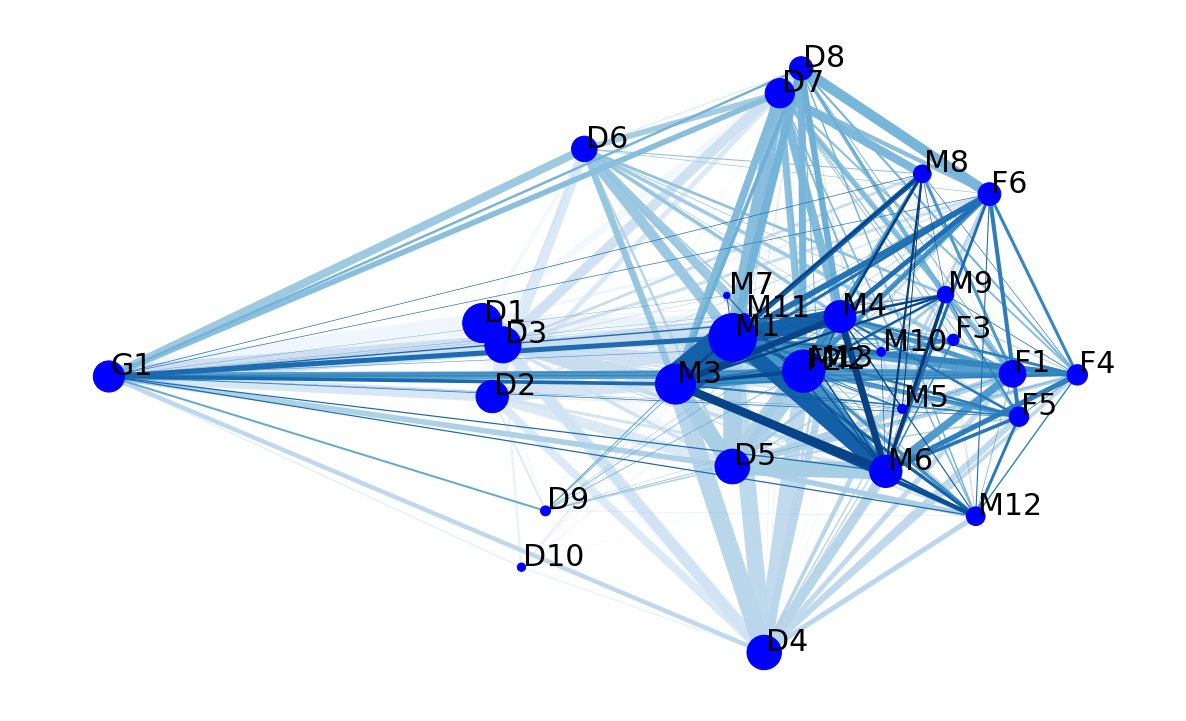

In [70]:
# 绘图
plt.figure(dpi=400)
plt.figure(figsize=[21, 13])
G = nx.Graph()
G.add_nodes_from(player_ori_huskies)  #添加点a
G.add_weighted_edges_from(pairs_distinct_1)

node_sizes = list(PointSize["count"])  # 点的数量
M = G.number_of_edges()  # 边的数量
# pos = nx.random_layout(G)

edge_colors = range(2, M + 2)

nodes = nx.draw_networkx_nodes(G, pos_player_mean, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos_player_mean, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues,
                               edge_vmin=0, edge_vmax=450,
                               width=[float(v['weight'] / 7) for (r, c, v) in G.edges(data=True)])

for i in range(len(player_huskies)):
    _player = player_huskies[i]
    _x, _y = pos_player_mean[_player]

    plt.text(_x + 0.12, _y + 0.12, _player[8:], size=30, alpha=1)
ax = plt.gca()
ax.set_axis_off()  # 取消图的边框
plt.savefig(path + 'test_total.png')
plt.show()